<p Style = "text-align: right"> Edit </p>
<h1 Style = "color: #5F9EA0; text-align: center"> Universidad Castro Carazo</h1>
<h2 Style = "color: #5F9EA0; text-align: center"> Empresa PK2 </h2>
<h2 Style = "color: #5F9EA0; text-align: center"> William Castillo Ortiz </h2>
<h2 Style = "color: #5F9EA0; text-align: center"> Profesor Josué Zúñiga Hernández </h2>
<h2 Style = "color: #5F9EA0; text-align: center"> 2023C2-G01-Análisis de Datos </h2>


<h3 Style = "color: #5F9EA0; text-align: left"> Empresa PK2 Data Frame </h3>

<p> Durante los años 2021 y 2022 la empresa PK2, ha estado analizando incursionar en la venta de bienes raíces en USA, siendo que previo a tomar una decisión respecto a dar inicio con las operaciones de venta de propiedades se procedió a recopilar información relacionada con el sector de bienes raíces de USA.

Como resultado de la recopilación de los datos, PK2 identificó y consolido un set de datos con 200.000 observaciones, cada una de ellas conformadas por 14 variables , es decir, se generó un Data Set de 2.800.000 datos. Razón por la cual se decicidio contratar de sus servicios para generar el proceso de análisis en pro de disponer de insumos para el proceso de toma de decisiones.

Particularmente la alta gerencia de PK2 desea disponer de información que le permita atender las siguientes interrogantes:</p>

<ol>
    <li> ¿Cuál es el ingreso anual de las propiedades vendidas? </li>
    <li> ¿Qué tipo de propiedad tiene mayor facilidad de venta? </li>
    <li> ¿En cuál ciudad o pueblo se dan a mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos? </li>
    <li> ¿Cuál es el costo promedio de las propiedades residenciales y comerciales? </li>
    <li> ¿Cuál es el tipo de propiedades residenciales que se venden con mayor frecuencia, dónde y con qué costo promedio? </li>
    <li> ¿Cuál es el margen promedio de ganancia por cada una de las propiedades vendidas? </li>
</ol>
    
<p> Adicionalmente, en función de los datos podría determinarse alguna estrategia de ventas de propiedades en alguna ciudad, siéntase en la libertad de incluir algunos otros datos que por contexto de negocio le parezcan relevantes para la toma de decisiones.
    
Es importante mencionar que producto de la labor de analítica su persona deberá entregar un informe ejecutivo donde se plasmen sus hallazgo y conclusiones, este no deberá superar 10 páginas.<p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["serial number", "list year", "date recorded", "town", "address", "asseseed value", "sale amount", "sales ratio", 
       "property type", "residential type", "non use code", "assessor remarks", "opm remarks", "location"]

df = pd.read_excel ("DataSet.xlsx", names = cols)

In [2]:
df.rename ({"serial number":"serialNumber"}, axis = 1, inplace = True)
df.rename ({"list year":"listYear"}, axis = 1, inplace = True)
df.rename ({"date recorded":"dateRecorded"}, axis = 1, inplace = True)
df.rename ({"asseseed value":"assedeedValue"}, axis = 1, inplace = True)
df.rename ({"sale amount":"saleAmount"}, axis = 1, inplace = True)
df.rename ({"sales ratio":"salesRatio"}, axis = 1, inplace = True)
df.rename ({"property type":"propertyType"}, axis = 1, inplace = True)
df.rename ({"residential type":"residentialType"}, axis = 1, inplace = True)
df.rename ({"non use code":"nonUseCode"}, axis = 1, inplace = True)
df.rename ({"assessor remarks":"assessorRemarks"}, axis = 1, inplace = True)
df.rename ({"opm remarks":"opmRemarks"}, axis = 1, inplace = True)
df.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assedeedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

ValueError: could not convert string to float: '  ASSESSMENT INCREASED TO $174'

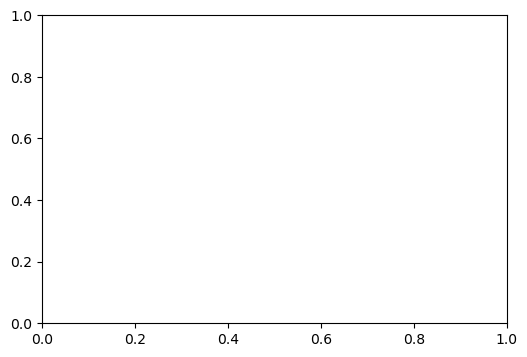

In [10]:
# Pregunta 1

ingreso_anual = df.groupby('listYear')['saleAmount'].sum()
plt.figure(figsize=(6, 4))
plt.plot(ingreso_anual.index, ingreso_anual.values, marker='o')
plt.title('Ingreso Anual de Propiedades Vendidas')
plt.xlabel('Año')
plt.ylabel('Ingreso Total')
plt.grid(True)
plt.show()

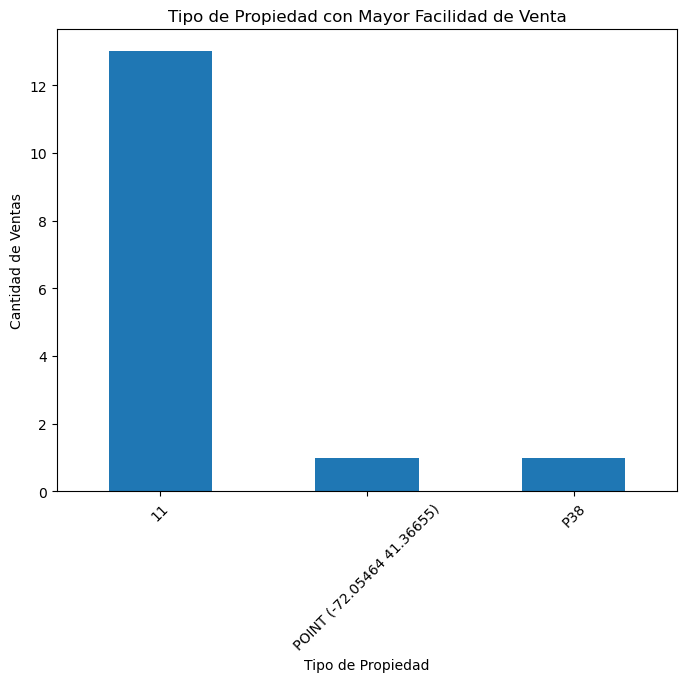

In [11]:
# Pregunta 2

plt.figure(figsize=(8, 6))
propiedad_facil_venta = df['propertyType'].value_counts()
propiedad_facil_venta.plot(kind='bar')
plt.title('Tipo de Propiedad con Mayor Facilidad de Venta')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

In [5]:
# Pregunta 3
ciudad_mas_ventas = df['town'].value_counts().idxmax()
elementos_particulares = df[df['town'] == ciudad_mas_ventas]['location'].unique()
print("\nPregunta 3:")
print(ciudad_mas_ventas)


Pregunta 3:
5


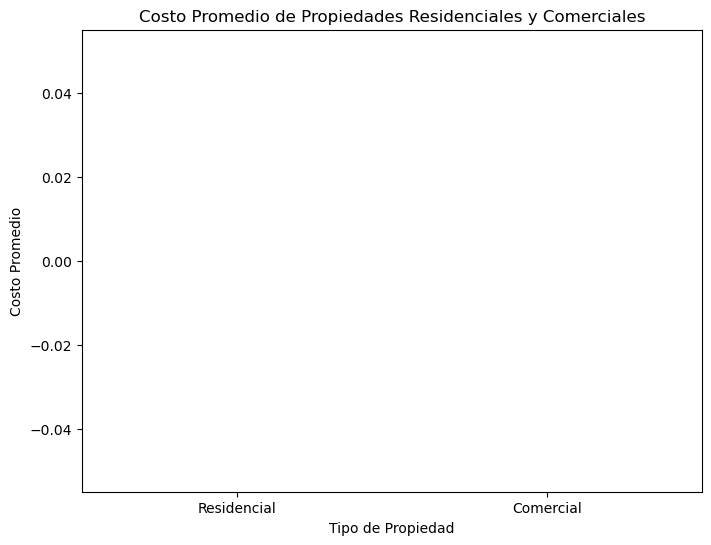

In [12]:
# Pregunta 4
costo_promedio_residencial = df[df['propertyType'] == 'Residential']['saleAmount'].mean()
costo_promedio_comercial = df[df['propertyType'] == 'Commercial']['saleAmount'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Residencial', 'Comercial'], y=[costo_promedio_residencial, costo_promedio_comercial])
plt.title('Costo Promedio de Propiedades Residenciales y Comerciales')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Costo Promedio')
plt.show()

In [13]:
# Pregunta 5

plt.figure(figsize=(10, 6))
tipo_propiedad_mas_vendida_data = df[df['propertyType'] == 'Residential']['residentialType'].value_counts()
sns.barplot(x=tipo_propiedad_mas_vendida_data.index, y=tipo_propiedad_mas_vendida_data.values)
plt.title('Tipo de Propiedades Residenciales Más Vendidas')
plt.xlabel('Tipo de Propiedad Residencial')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [14]:
# Pregunta 6
df['ganancia'] = df['saleAmount'] - df['assedeedValue']
margen_promedio_ganancia = df['ganancia'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(df['ganancia'], bins=20, kde=True)
plt.title('Distribución del Margen de Ganancia por Propiedad Vendida')
plt.xlabel('Margen de Ganancia')
plt.ylabel('Cantidad de Propiedades')
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'str'